In [61]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
def fatorial(inteiro,acumulador=1):
    for i in range(1, inteiro + 1):
        acumulador *= i
    
    return acumulador

def f_chapeu(x,n):
    acumulador = 1

    for _ in range(n):
        acumulador += ((x)**2)**0.5/fatorial(n+1)
    
    if x >= 0:
        return acumulador
    
    else:
        return 1/acumulador

def f_real(x):  
    return np.exp(x)

In [84]:
reuslts_dict = {
    "x": [],
    "n": [],
    "f_chapeu": [],
    "f_real": [],
    "rse": [],
    "ape": [],
}

n_list = np.linspace(3,7,dtype=int,num=5)
x_list = (-20, -10, -2, -1, 1, 2, 10, 20)

for x in x_list:
    real = f_real(x)

    for n in n_list:
        aproximado = f_chapeu(x,n)

        rse = ((real - aproximado)**2)**0.5
        
        ape = rse/((real)**2)**0.5

        reuslts_dict["x"].append(x)
        reuslts_dict["n"].append(n)
        reuslts_dict["f_chapeu"].append(aproximado)
        reuslts_dict["f_real"].append(real)
        reuslts_dict["rse"].append(rse)
        reuslts_dict["ape"].append(ape)

df_resultados = pd.DataFrame(reuslts_dict)
df_resultados.head()

,x,n,f_chapeu,f_real,rse,ape
0,-20,3,0.285714,2.061154e-09,0.285714,1.386186e+08
1,-20,4,0.600000,2.061154e-09,0.600000,2.910991e+08
2,-20,5,0.878049,2.061154e-09,0.878049,4.259987e+08
3,-20,6,0.976744,2.061154e-09,0.976744,4.738823e+08
4,-20,7,0.996540,2.061154e-09,0.996540,4.834864e+08


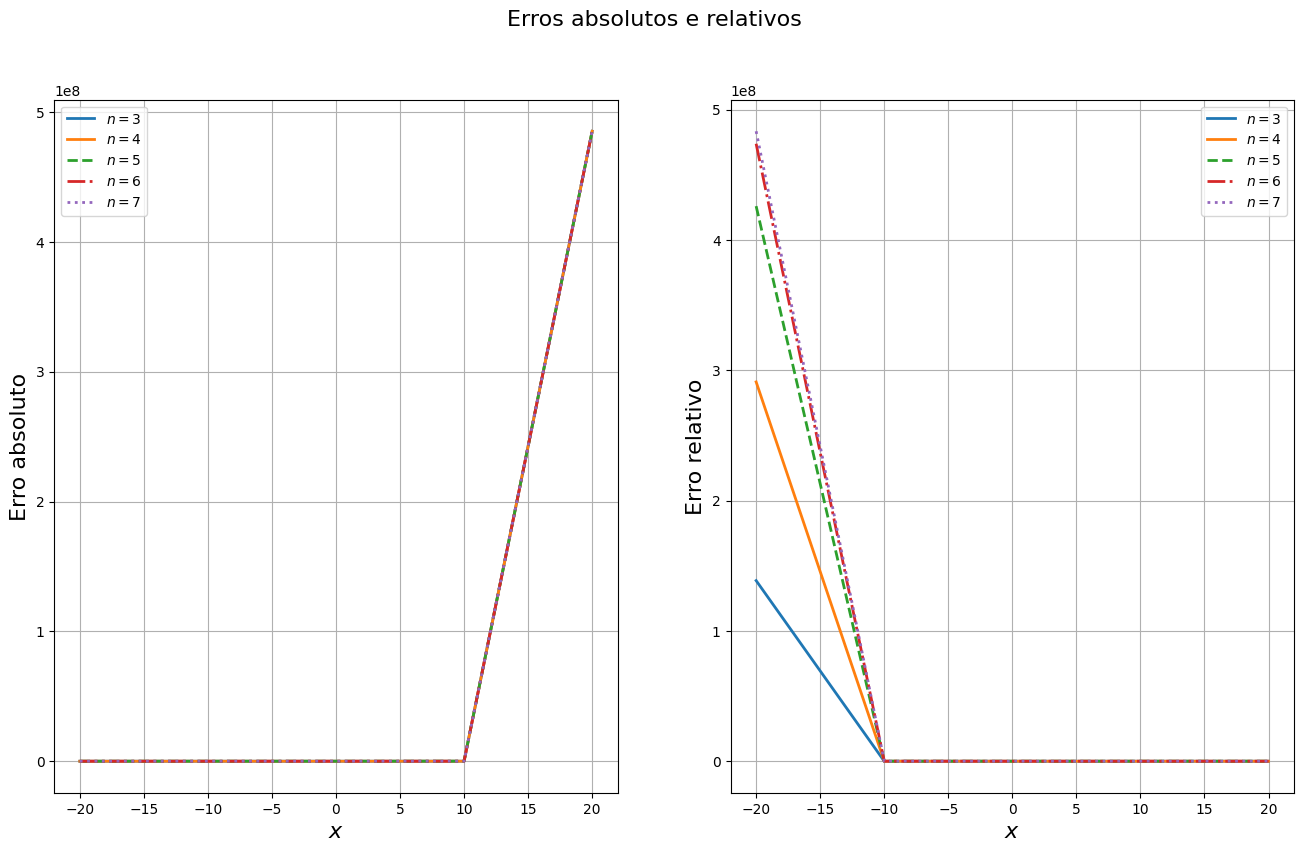

In [85]:
## Plotando erro absoluto

linestyles = [ '-', '-', '--', '-.', ':']

fig = plt.figure(figsize=[16, 9])
fig.suptitle('Erros absolutos e relativos', fontsize=16)

# Plotango Erros absolutos 
ax = fig.add_subplot(1, 2, 1)

ax.set_ylabel('Erro absoluto', fontsize=16)
ax.set_xlabel('$x$', fontsize=16)

for n,ls in zip(np.unique(df_resultados.n.values),linestyles):
        df_filtred = df_resultados.loc[df_resultados.n==n]

        ax.plot(df_filtred.x.values, df_filtred.rse.values, linewidth=2, linestyle=ls,
                label='$n = ${:d}'.format(n))
ax.legend()
ax.grid()
        

# Plotando 2D

ax = fig.add_subplot(1, 2, 2)

ax.set_ylabel('Erro relativo', fontsize=16)
ax.set_xlabel('$x$', fontsize=16)

for n,ls in zip(np.unique(df_resultados.n.values),linestyles):
        df_filtred = df_resultados.loc[df_resultados.n==n]

        ax.plot(df_filtred.x.values, df_filtred.ape.values, linewidth=2, linestyle=ls,
                label='$n = ${:d}'.format(n))
ax.legend()
ax.grid()

plt.show()

#Questão 3
Considerando a base decimal, para o numéro 3,2345, temos que:

Valor arredondado: 3,235
Valor truncado: 3,234

Erro absouto arredondamento:  0,0005 <= 
